# Question 1(I) Dognition Personality Dimension

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

In [120]:
dognition_agg=pd.read_excel("dognition_data_aggregated_by_dogid.xlsx")
display(dognition_agg)

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.547222,0.004786,6.891667,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,...,10.0,0.0,NaN,NaN,NaN,NaN,0,0,2015-10-12 14:44:00,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,NaN,NaN,NaN,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 20:43:00,4
17983,fdc23ba8-7144-11e5-ba71-058fbc01cf0b,20,0.004957,7.137719,0.004201,6.050000,0.094178,135.616667,ce9b306e-7144-11e5-ba71-058fbc01cf0b,female,...,10.0,1.0,Carolina Beach,NC,28428,US,0,0,2015-10-12 20:13:00,1
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444,0.002778,4.000000,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 19:17:00,4


In [121]:
tests_dimension = dognition_agg[["Total Tests Completed", "Dimension"]]
show_a_dimension=tests_dimension.groupby(['Dimension']).get_group('einstein')
print(show_a_dimension)

       Total Tests Completed Dimension
4                         31  einstein
8                         20  einstein
32                        20  einstein
46                        20  einstein
61                        22  einstein
...                      ...       ...
17230                     20  einstein
17401                     20  einstein
17708                     20  einstein
17760                     20  einstein
17839                     20  einstein

[129 rows x 2 columns]


/var/folders/sz/vjzx_ntj38v1_t2lkqpjprj40000gn/T/ipykernel_98469/1731725944.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  show_a_dimension=tests_dimension.groupby(['Dimension']).get_group('einstein')


In [122]:
#SHOW THE SUM OF NUMBER OF TESTS FOR EACH DIMENSION
total_tests_for_each_dim= dognition_agg.groupby('Dimension')['Total Tests Completed'].sum()
print(total_tests_for_each_dim)

Dimension
0                  85786
ace                10383
charmer            14884
einstein            2791
expert              6425
maverick            5769
protodog           13078
renaissance-dog    10922
socialite          18671
stargazer           7664
Name: Total Tests Completed, dtype: int64


In [128]:
#EXCLUDE THE 0 IN THE DIMENSION COLUMN
dognition_agg = dognition_agg[dognition_agg.Dimension != 0]
total_tests_for_each_dim= dognition_agg.groupby('Dimension')['Total Tests Completed'].sum()
print(total_tests_for_each_dim)

Dimension
ace                10383
charmer            14884
einstein            2791
expert              6425
maverick            5769
protodog           13078
renaissance-dog    10922
socialite          18671
stargazer           7664
Name: Total Tests Completed, dtype: int64


<Axes: xlabel='Dimension'>

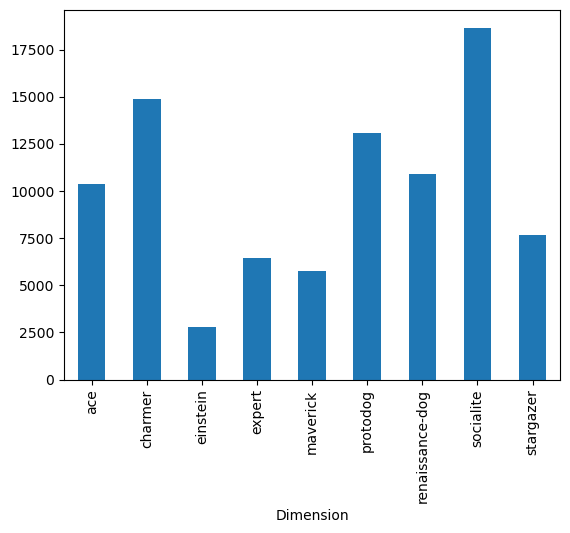

In [146]:
total_tests_for_each_dim.plot(x='Dimension', y='Total Tests Completed', kind='bar')
#plt.bar(data=total_tests_for_each_dim,x='Dimension',height='Total Tests Completed')